# Notebook 2: Value Function Iteration (VFI)

In [1]:
using LaTeXStrings
using Plots;

In [2]:
# Structural parameters
β = 0.99     #discount rate
δ = 0.025    #depreciation rate
α = 0.33     #capital share
γ = 1.;      #EIS

In [3]:
# Steady-state value
kstat = ((1-β*(1-δ))/(β*α))^(1/(α-1))
cstat = kstat^α - δ*kstat;

In [4]:
# Discretize capital
k_low  = 0.8*kstat                 #lowest value for capital
k_high = 1.2*kstat                 #highest value for capital
nk     = 501                       #number of grid points 
dk     = (k_high-k_low)/(nk - 1)   #step size
k_vec  = [k_low:dk:k_high;]        #capital vector
ks     = k_low:dk:k_high;          #range for plots

In [5]:
k0 = ones(nk,1) *k_vec';         #capital today (state)
k1 = k_vec*ones(1,nk)            #capital for the next period
c  = k0.^α - k1 + (1-δ) .* k0    #consumption
c[findall(x->x<0,c)] .= 0.;      #set negative consumption values to zero
#period utility 
if γ == 1
    u = log.(c)                    
else
    u = (c.^(1-γ).-1)/(1-γ)
end
nothing;

$k_0$ is the state as row vector replicated $n_k$ times.
<br>
$k_1$ is the state in the next period as column vector replicated $n_k$ times.
<br>
$c$ is a matrix that maps pairs $(k_0,k_1)$ into consumption, a column $c_{_,j}$ are all the possible values of consumption that can be attained when the state is $k_j$.
<br>
$u$ is the utility implied by $c$.

In [6]:
#initialize VFI algorithm
tol  = 1e-4             #tolerance for the fixed-point of V
iter = 0                #iteration counter
dist = [10e6]           #initialize a measure of distance between iterates of V
V    = zeros(nk)        #initial guess for the value function
P    = zeros(nk);       #initialize a vector for the policy function

In [7]:
# VFI algorithm
while dist[end] > tol 
    
    W = u + β*V*ones(1,nk)
    
    TV, TP = findmax(W,dims=1)  #maximize for a given stock of capital 
    #(i.e., for each column of W, finds the maximum over rows.)
    
    TV = TV[1,:]
    TP = getindex.(TP[1, :],1)
    
    dist = [dist; maximum(abs.(TV - V))]
    
    #update policy and value functions
    V  = TV
    P  = TP
    
    iter+=1
    
end
dist=dist[2:end];

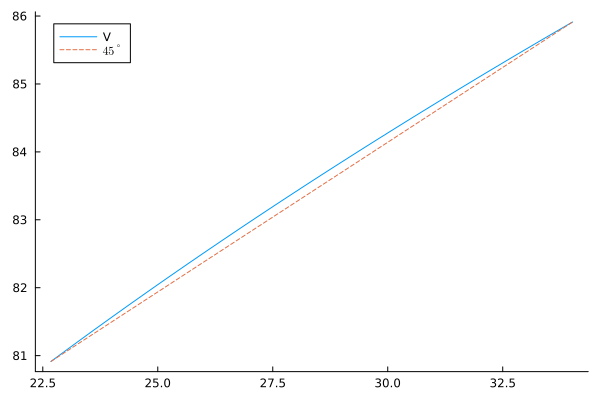

In [8]:
# Value function
Vmin, Vmax = extrema(V)
line45 = Vmin .+ (Vmax - Vmin) .* (ks .- k_low) ./ (k_high - k_low)
plot(ks, V, label = "V", grid = false)
plot!(ks, line45, linestyle = :dash, label = L"45^\circ")

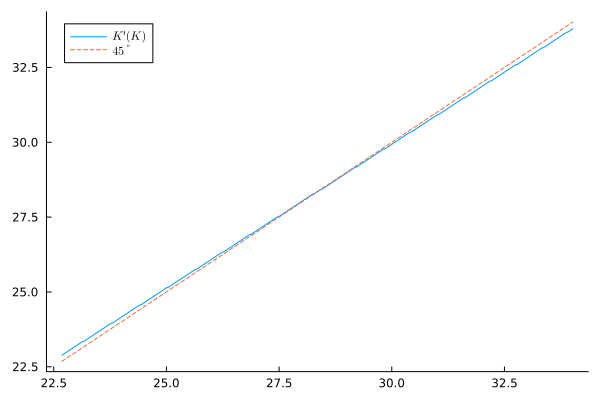

In [9]:
# Policy function
plot(ks,k_vec[P],label=L"K'(K)",grid=false)
plot!(ks,ks,linestyle=:dash,label = L"45^\circ")